In [230]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#About the Dataset

We'll start with general information about the dataset.

The dataset consists of 35,887 entries. Each entry has 3 columns: emotion, pixels, and usage.

Each face is classified into one of 7 emotions: anger, disgust, fear, happy, sad, surprise, or neutral. An encoding for these go into the emotion column for an entry.

The pixel information for each image goes into the pixel column (a 48x48 image, so 2304 values should be in each entry's pixels column. Values range from 0-255)

Lastly, usage decides whether or not an image will be used for training, publictest (validation), and privatetest. We will probably remove this.

The dataset contains a good variety of faces which range from varying ages, people with/without makeup, people of different races, actors, even some instances of virtual avatars, etc.

To summarize, the dataset contains a large variety and quantity of faces which will be very useful in making a machine learning model.


#Data Exploration

In [231]:
#Name of csv is fer2013.csv
df = pd.read_csv('fer2013.csv')

###Number of entries/observations

In [232]:
entryCount = len(df)
print("The number of entries is:", entryCount)
print("This means we have",entryCount, "images.")

The number of entries is: 35887
This means we have 35887 images.


###An entry is composed of 3 things: emotion, pixels, and Usage



In [233]:
#An entry is comprised of an emotion, the pixels, and the usage (training, publictest, privatetest)
print(df.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


**Emotion**: Encoded from 0-6. Each number is encoded as a different emotion. 0 is angry, 1 is disgust, 2 is fear, 3 is happy, 4 is sadness, 5 is surprise, and 6 is neutral.
</br>

**Pixels**: Composes the 48x48 grey scale image. Each number is one pixel of the 48x48 image. The max value is 255 which is white and the lowest is 0 which is black. Will most likely normalize these pixel values.
</br>

**Usage**: Either testing, publictest, or private test. May remove this to gurantee the model is authentic as it could be (the model should be able to perform well regardless of what data it learns from)

In [234]:
#Confirming that the above is true. Note 48*48 = 2304
print("Encodings are:",df['emotion'].unique(),"\n")
print(df["pixels"].apply(lambda n:(len(n.split()))))
print("\nDifferent usages are:",df['Usage'].unique())

Encodings are: [0 2 4 6 3 5 1] 

0        2304
1        2304
2        2304
3        2304
4        2304
         ... 
35882    2304
35883    2304
35884    2304
35885    2304
35886    2304
Name: pixels, Length: 35887, dtype: int64

Different usages are: ['Training' 'PublicTest' 'PrivateTest']


###How much of each image class (emotion) do we have?

In [235]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

We will probably divide the dataset such that each emotion only has 547 images (bounded by the least). This is because we don't want the model to become bias to seeing one emotion significantly more than another. This will also speed up computation time.
</br>


***We have already created a Python script to do this and will be on the GitHub***

In [236]:
LIMIT = 547

def isLimit(map):
    for key in map:
        if map[key] < LIMIT:
            return False
    return True

def saveData(data):
    with open('face-emo.csv', 'w') as file:
        file.writelines(data)
    print("data saved under face-emo.csv")
    return


"""
    { 0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprize", 6: "Neutral" }

    This function is used to balance the data between emotions so we have an
    even number of pixels for each categories. The new data is saved in a new
    file called face-emo.csv.

    TODO: We might need to remove the Usage Column
"""
def fetch_data():
    data = []
    classes = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

    with open('fer2013.csv', 'r') as file:
        data.append(file.readline())

        for line in file:
            emo = int(line.split(',')[0])

            if classes[emo] != LIMIT:
                data.append(line)
                classes[emo] += 1

            if isLimit(classes) == True:
                break

        print(classes)

        # print(f"length of data should equal 547 * 7. data = {len(data) - 1} == {547 * 7}")
        # Saving new data
        saveData(data)

    return


if __name__ == "__main__":
    fetch_data()

{0: 547, 1: 547, 2: 547, 3: 547, 4: 547, 5: 547, 6: 547}
data saved under face-emo.csv


###Handling Null Data
We already shouldn't have any null data. However, we'll confirm it for good measure.

In [237]:
modified_df = pd.read_csv('face-emo.csv')

print(modified_df.emotion.value_counts())
print(modified_df.pixels.value_counts())
modified_df.isna()

0    547
2    547
4    547
6    547
3    547
5    547
1    547
Name: emotion, dtype: int64
255 251 97 82 75 51 52 86 125 160 182 192 198 203 206 211 214 216 216 214 214 212 214 215 214 213 213 214 215 214 208 198 170 116 86 62 46 45 42 43 46 52 101 136 124 78 169 255 255 218 92 97 56 44 67 118 150 170 181 189 197 202 205 211 212 212 213 212 213 213 213 214 213 213 214 215 215 214 213 213 212 199 154 102 63 45 44 42 44 49 68 145 148 90 146 255 255 194 117 77 42 55 95 140 157 171 180 187 194 199 202 207 209 208 210 213 211 212 212 212 212 214 216 215 213 212 212 209 205 202 200 177 124 68 47 44 40 45 56 108 172 126 151 253 255 204 125 51 52 78 119 151 162 172 179 186 188 194 197 201 205 205 207 210 210 210 211 212 212 214 214 213 210 208 207 205 200 194 192 191 181 129 71 50 43 38 58 91 162 185 161 241 255 199 81 48 67 99 129 150 166 173 178 185 188 190 192 195 198 201 203 206 208 208 208 208 208 208 208 206 204 202 199 198 193 189 189 187 188 183 132 72 53 43 37 75 133 208 182 234 255 1

,emotion,pixels,Usage
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3824,False,False,False
3825,False,False,False
3826,False,False,False
3827,False,False,False


In [238]:
modified_df.dropna()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
3824,1,48 34 21 18 16 21 26 36 40 44 53 57 64 82 95 9...,PrivateTest
3825,1,98 103 107 105 100 103 108 112 110 109 109 112...,PrivateTest
3826,1,247 247 247 246 252 224 150 215 207 202 197 19...,PrivateTest
3827,1,186 146 50 42 43 35 48 93 124 146 167 168 170 ...,PrivateTest


Dropping null data won't ruin the model. We'll just have less images to learn from, and this project isn't related to statistical trends. Dropping where we can is good because it will help with computation speed.

###Plotting our example classes

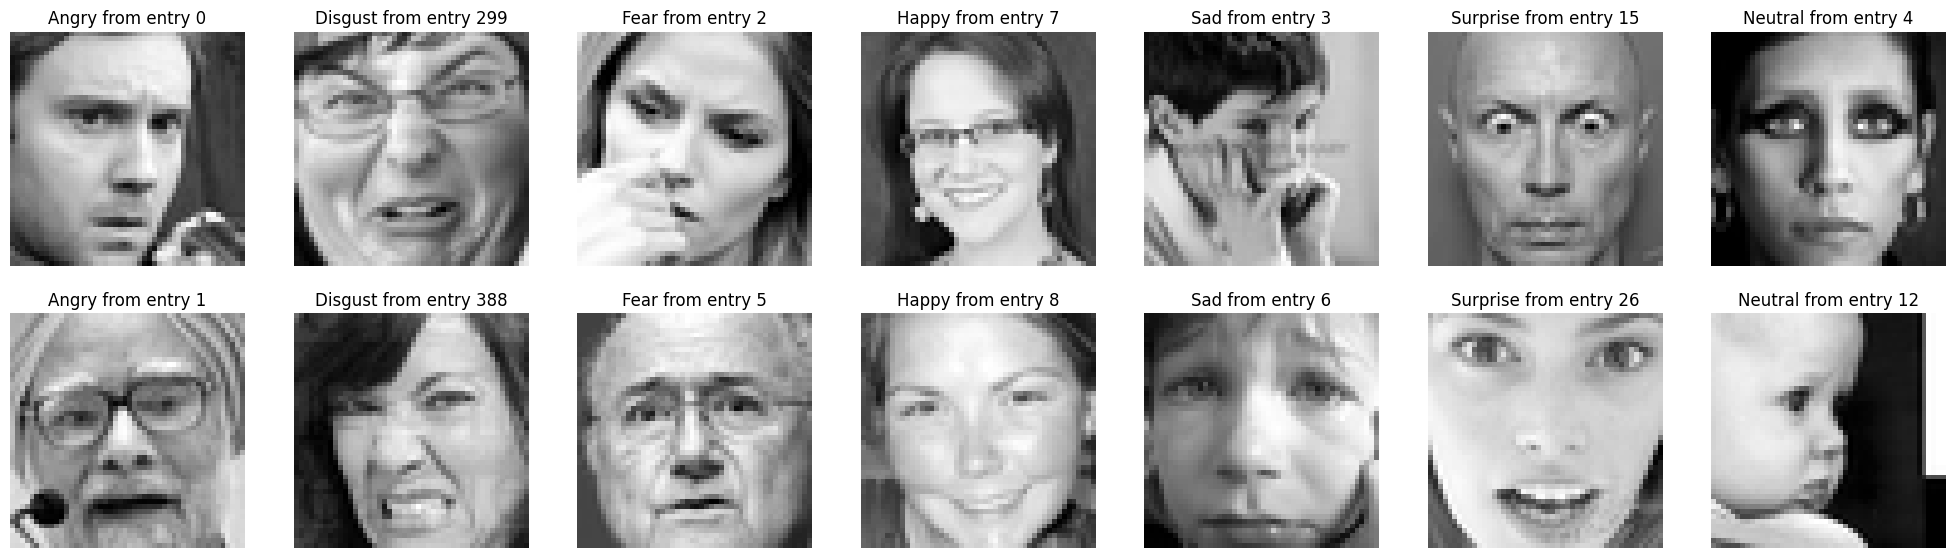

In [239]:
emotionLabels = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

def displayClasses():
  #The first and second instances of each emotion class.
  #Feel free to change the indices array to look at other images in the dataset
    indices = [0,299,2,7,3,15,4,1,388,5,8,6,26,12]
    plt.figure(figsize=(25,25))

    for i,locationIt in zip(indices,range(0,len(indices))):
        #Get the entry and convert it to an array
        pixelArray = np.array([i for i in df['pixels'][i].split(" ")] , dtype='float')

        #Convert array to 48*48 matrix
        pixels = np.reshape(pixelArray,(48,48))

        #Subplot/plot settings
        plt.subplot(7,7,locationIt+1)
        plt.axis("off")
        plt.imshow(pixels,cmap='gray')
        plt.title(emotionLabels[modified_df['emotion'][i]]+" from entry "+str(i))

displayClasses()


###Preprocessing Procedure

The dataset is already almost completely preprocessed. The pixels have been compressed to be 48 x 48 and have already been converted to greyscale. This means we have to do little preprocessing on the images.
</br>

However, we plan to normalize the grey scale values within each entry's pixel column. This will make the pixel column more readable, and less greyscale intensity with numerous images may help with overall speed as normalizing may help with gradient calculation.

We also plan to get an even amount of images from each emotion class, 547, in order to ensure our model doesn't become bias to seeing one emotion too much and hopefully speed up computations for our dataset. This will also justify our removal for the usage column.
</br>

The images don't need to be cropped or resized. We don't need to crop them because the images are already pretty decently focused on people's face, and a good facial recognition model should be able to detect faces even in bad circumstances. They don't need to be resized too because they are already very small. Normalization will mostly likely occur.




In [240]:
#normalizing pixel data of our data frame

from sklearn.preprocessing import MinMaxScaler

#each pixel entry in the data frame is of type string, so first we must convert them into a list of arrays
#function to convert string into array of numbers
def string_to_array(numbers_string):
    number_strings = numbers_string.split()
    numbers_array = np.array([float(number) for number in number_strings])
    return numbers_array

# Apply the function to the DataFrame column
modified_df['pixels'] = modified_df['pixels'].apply(string_to_array)


#drop the unnecessary columns (label column and column with string data)
pixelnormdf = modified_df.drop(columns =['emotion', 'Usage'])

print(pixelnormdf)

scaler = MinMaxScaler()

#since minmax scalar only works on one value, we must iterate over the array in each row of number in the data frame
for i, row in pixelnormdf.iterrows():
    scaled_array = scaler.fit_transform(np.array(row['pixels']).reshape(-1, 1))
    pixelnormdf.loc[i, 'pixels'] = scaled_array.flatten()

print(pixelnormdf)


                                                 pixels
0     [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1     [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2     [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3     [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4     [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...                                                 ...
3824  [48.0, 34.0, 21.0, 18.0, 16.0, 21.0, 26.0, 36....
3825  [98.0, 103.0, 107.0, 105.0, 100.0, 103.0, 108....
3826  [247.0, 247.0, 247.0, 246.0, 252.0, 224.0, 150...
3827  [186.0, 146.0, 50.0, 42.0, 43.0, 35.0, 48.0, 9...
3828  [58.0, 83.0, 97.0, 101.0, 104.0, 105.0, 107.0,...

[3829 rows x 1 columns]
                                                 pixels
0     [0.2964824120603015, 0.34673366834170855, 0.35...
1     [0.6894977168949772, 0.684931506849315, 0.6712...
2     [0.9058823529411765, 0.8313725490196078, 0.611...
3     [0.053811659192825115, 0.08968609865470852, 0....
4     [0.01659751037344